# SIT744 Assignment 2: Transfer learning and Efficient Training of Deep Learning Models 

<div class="alert-info">
    <p>Due: <strong>8:00pm 17 May 2021</strong>  (Monday)</p>

This is an <strong>individual</strong> assignment. It contributes <strong>45%</strong> to your final mark. Read the assignment instruction carefully.

<h2> What to submit </h2>

<p>
This assignment is to be completed individually and submitted to CloudDeakin. <strong>By the due date, you are required to submit the following files to the corresponding Assignment (Dropbox) in CloudDeakin</strong>:

<ol>
<li>	<strong>[YourID]_assignment2_solution.ipynp</strong>:  This is your Python notebook solution source file. </li>
<li>	<strong>[YourID]_assingment2_output.html</strong>: This is the output of your Python notebook solution <emph>exported</emph> in HTML format.</li>
<li>	Extra files needed to complete your assignment, if any (e.g., images used in your answers).</li>
</ol>
</p>

<p>
For example, if your student ID is: 123456, you will then need to submit the following files:
<ul>
<li> 123456_assignment2_solution.ipynp </li>
<li> 123456_assignment2_output.html</li>
</ul>
</p>

<h2> Warning </h2>

Some components of this assignment may involve heavy computation that runs for a long duration. Please start early to avoid missing the assignment due date.

<h2> Marking criteria </h2>

<p>
Your submission will be marked using the following criteria.

<ul>
<li> Showing good effort through completed tasks.</li>
<li> Applying deep learning theory to design suitable deep learning solutions for the tasks.</li>
<li> Critically evaluating and reflecting on the pros and cons of various design decisions.</li>
<li> Demonstrating creativity and resourcefulness in providing unique individual solutions.</li>
<li> Showing attention to details through a good quality assignment report.</li>
</ul>
</p>

<p>
Indicative weights of various tasks are provided, but the assignment will be marked by the overall quality per the above criteria.
</p>
</div>

## Assignment objective

This assignment is to feedback on your learning in deep learning theory and its application to  data analytics or artificial intelligence problems.  

It builds on Assignment 1 but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter  practical issues that help you consolidate textbook learning. 

## Task 1 Solving Fashion-MNIST with Convolutional Neural Networks

*(weight ~15%)*

In Assignment 1, you tackled the image classification problem in Fashion-MNIST. There, you used a Densely Connected Neural Network. You should now know that is not an optimal model architecture for the problem. In Assignment 2, you will apply the best practices of deep-learning computer vision to achieve better image classification performance.

### Task 1.1 Revisit Fashion-MNIST classification with DNN

*(weight ~1%)*

Review your Assignment 1 solution, and reproduce the experiment here. Try to improve the model without changing the model architecture.


As per requirement, reproducing final model in DNN with highest accurracy. Doing hyper parameter tuning for further improvement with same model architecture.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#Importing MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


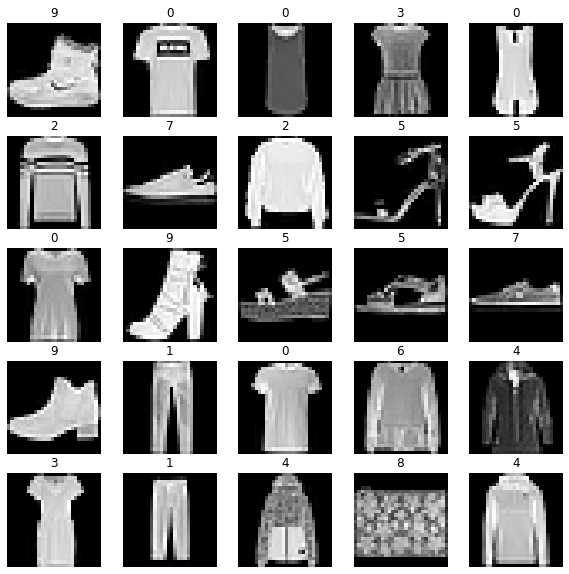

In [ ]:
#Plotting first 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(y_train[i])
  plt.axis("off")

In [ ]:
#Normalizing data
np.unique(y_train)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape,y_test.shape

((60000, 10), (10000, 10))

In [ ]:
#Reserving 10% data for validation set from training set and creating input pipelines
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]
train_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(512,drop_remainder=True)
train_dataset=train_dataset.shuffle(buffer_size=50000)
val_dataset=tf.data.Dataset.from_tensor_slices((x_val,y_val)).batch(512,drop_remainder=True)
test_dataset=tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(512,drop_remainder=True)
print(train_dataset)
print(val_dataset)
print(test_dataset)

<ShuffleDataset shapes: ((512, 28, 28), (512, 10)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((512, 28, 28), (512, 10)), types: (tf.float32, tf.float32)>
<BatchDataset shapes: ((512, 28, 28), (512, 10)), types: (tf.float32, tf.float32)>


In [ ]:
#Reproducing Final model from Assignment-1 with highest accuracy
from tensorflow.keras import models,layers,optimizers
from keras.callbacks import EarlyStopping

model_11=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')])

model_11.compile(optimizer=optimizers.RMSprop(lr=0.0005),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Initialzing weights for the model
init_weights = model_11.get_weights()
history=model_11.fit(train_dataset, validation_data=(val_dataset), epochs=70)

Epoch 1/70
97/97 [==============================] - 2s 10ms/step - loss: 1.0615 - accuracy: 0.6457 - val_loss: 0.5798 - val_accuracy: 0.8042
Epoch 2/70
97/97 [==============================] - 1s 9ms/step - loss: 0.5704 - accuracy: 0.7972 - val_loss: 0.4673 - val_accuracy: 0.8359
Epoch 3/70
97/97 [==============================] - 1s 9ms/step - loss: 0.5027 - accuracy: 0.8234 - val_loss: 0.4476 - val_accuracy: 0.8420
Epoch 4/70
97/97 [==============================] - 1s 9ms/step - loss: 0.4596 - accuracy: 0.8366 - val_loss: 0.4271 - val_accuracy: 0.8493
Epoch 5/70
97/97 [==============================] - 1s 10ms/step - loss: 0.4357 - accuracy: 0.8450 - val_loss: 0.4036 - val_accuracy: 0.8618
Epoch 6/70
97/97 [==============================] - 1s 10ms/step - loss: 0.4199 - accuracy: 0.8494 - val_loss: 0.3858 - val_accuracy: 0.8640
Epoch 7/70
97/97 [==============================] - 1s 10ms/step - loss: 0.3963 - accuracy: 0.8561 - val_loss: 0.3778 - val_accuracy: 0.8649
Epoch 8/70
97/97

In [ ]:
#Testing on Val
val_loss, val_acc = model_11.evaluate(val_dataset)
print(f'val_loss: {val_loss}')
print(f'val_acc: {val_acc}')

19/19 [==============================] - 0s 5ms/step - loss: 0.2868 - accuracy: 0.8979
val_loss: 0.286799818277359
val_acc: 0.8979235291481018


In [ ]:
#Testing on Test set
test_loss, test_acc = model_11.evaluate(test_dataset)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

19/19 [==============================] - 0s 4ms/step - loss: 0.3129 - accuracy: 0.8910
test_loss: 0.3129025399684906
test_acc: 0.8910362124443054


In [ ]:
#Attempt-1:Adding Batch normalization and Dropout
model_12=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.BatchNormalization(axis=1),   
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dense(10,activation='softmax')])

model_12.compile(optimizer=optimizers.RMSprop(lr=0.0005),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_12.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 410,186
Trainable params: 408,618
Non-trainable params: 1,568
_________________________________________________________________


In [ ]:
#Initialzing weights for the model
init_weights = model_12.get_weights()
history=model_12.fit(train_dataset, validation_data=(val_dataset), epochs=70)

Epoch 1/70
97/97 [==============================] - 2s 12ms/step - loss: 0.8029 - accuracy: 0.7245 - val_loss: 0.7164 - val_accuracy: 0.8101
Epoch 2/70
97/97 [==============================] - 1s 11ms/step - loss: 0.4288 - accuracy: 0.8462 - val_loss: 0.4480 - val_accuracy: 0.8608
Epoch 3/70
97/97 [==============================] - 1s 10ms/step - loss: 0.3714 - accuracy: 0.8656 - val_loss: 0.3861 - val_accuracy: 0.8610
Epoch 4/70
97/97 [==============================] - 1s 10ms/step - loss: 0.3489 - accuracy: 0.8721 - val_loss: 0.3523 - val_accuracy: 0.8713
Epoch 5/70
97/97 [==============================] - 1s 11ms/step - loss: 0.3266 - accuracy: 0.8806 - val_loss: 0.3409 - val_accuracy: 0.8746
Epoch 6/70
97/97 [==============================] - 1s 10ms/step - loss: 0.3097 - accuracy: 0.8865 - val_loss: 0.3413 - val_accuracy: 0.8721
Epoch 7/70
97/97 [==============================] - 1s 10ms/step - loss: 0.3013 - accuracy: 0.8871 - val_loss: 0.3203 - val_accuracy: 0.8819
Epoch 8/70
97

In [ ]:
#Testing on Val
val_loss, val_acc = model_12.evaluate(val_dataset)
print(f'val_loss: {val_loss}')
print(f'val_acc: {val_acc}')

19/19 [==============================] - 0s 5ms/step - loss: 0.3737 - accuracy: 0.9003
val_loss: 0.37370768189430237
val_acc: 0.9002878069877625


In [ ]:
#Testing on Test set
test_loss, test_acc = model_12.evaluate(test_dataset)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

19/19 [==============================] - 0s 5ms/step - loss: 0.3890 - accuracy: 0.8977
test_loss: 0.38898155093193054
test_acc: 0.8977179527282715


In [ ]:
#Attempt-3:Increasing Batch normalization and Dropout
model_13=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.BatchNormalization(axis=1),   
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(10,activation='softmax')])

model_13.compile(optimizer=optimizers.RMSprop(lr=0.0005),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_13.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 410,186
Trainable params: 408,618
Non-trainable params: 1,568
____________________________________________

In [ ]:
init_weights = model_13.get_weights()
history=model_13.fit(train_dataset, validation_data=(val_dataset), epochs=50)

Epoch 1/50
97/97 [==============================] - 2s 12ms/step - loss: 0.8592 - accuracy: 0.7063 - val_loss: 0.7124 - val_accuracy: 0.8160
Epoch 2/50
97/97 [==============================] - 1s 11ms/step - loss: 0.4578 - accuracy: 0.8351 - val_loss: 0.4461 - val_accuracy: 0.8618
Epoch 3/50
97/97 [==============================] - 1s 11ms/step - loss: 0.4040 - accuracy: 0.8528 - val_loss: 0.3782 - val_accuracy: 0.8660
Epoch 4/50
97/97 [==============================] - 1s 10ms/step - loss: 0.3792 - accuracy: 0.8639 - val_loss: 0.3512 - val_accuracy: 0.8725
Epoch 5/50
97/97 [==============================] - 1s 11ms/step - loss: 0.3502 - accuracy: 0.8708 - val_loss: 0.3353 - val_accuracy: 0.8786
Epoch 6/50
97/97 [==============================] - 1s 11ms/step - loss: 0.3249 - accuracy: 0.8792 - val_loss: 0.3371 - val_accuracy: 0.8752
Epoch 7/50
97/97 [==============================] - 1s 11ms/step - loss: 0.3174 - accuracy: 0.8827 - val_loss: 0.3151 - val_accuracy: 0.8848
Epoch 8/50
97

In [ ]:
#Testing on Val
val_loss, val_acc = model_13.evaluate(val_dataset)
print(f'val_loss: {val_loss}')
print(f'val_acc: {val_acc}')

19/19 [==============================] - 0s 5ms/step - loss: 0.3072 - accuracy: 0.9033
val_loss: 0.3071894347667694
val_acc: 0.9032689332962036


In [ ]:
#Testing on Test set
test_loss, test_acc = model_13.evaluate(test_dataset)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

19/19 [==============================] - 0s 5ms/step - loss: 0.3267 - accuracy: 0.9010
test_loss: 0.3266746997833252
test_acc: 0.9010074138641357


In [ ]:
#Attempt-4:Adding Batch normalization and increasing Dropout rate
model_14=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.BatchNormalization(axis=1),   
                        keras.layers.Dropout(0.3),
                        keras.layers.Dense(512,activation='relu'),
                        keras.layers.BatchNormalization(axis=1),   
                        keras.layers.Dropout(0.3),
                        keras.layers.Dense(10,activation='softmax')])

model_14.compile(optimizer=optimizers.RMSprop(lr=0.0005),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model_14.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dropout_5 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

In [ ]:
init_weights = model_14.get_weights()
history=model_14.fit(train_dataset, validation_data=(val_dataset), epochs=100)

Epoch 1/100
97/97 [==============================] - 2s 15ms/step - loss: 0.9154 - accuracy: 0.7000 - val_loss: 0.7342 - val_accuracy: 0.7839
Epoch 2/100
97/97 [==============================] - 1s 13ms/step - loss: 0.4903 - accuracy: 0.8240 - val_loss: 0.4959 - val_accuracy: 0.8300
Epoch 3/100
97/97 [==============================] - 1s 13ms/step - loss: 0.4400 - accuracy: 0.8405 - val_loss: 0.4161 - val_accuracy: 0.8469
Epoch 4/100
97/97 [==============================] - 1s 13ms/step - loss: 0.4088 - accuracy: 0.8510 - val_loss: 0.3768 - val_accuracy: 0.8650
Epoch 5/100
97/97 [==============================] - 1s 13ms/step - loss: 0.3866 - accuracy: 0.8596 - val_loss: 0.3491 - val_accuracy: 0.8733
Epoch 6/100
97/97 [==============================] - 1s 13ms/step - loss: 0.3739 - accuracy: 0.8617 - val_loss: 0.3446 - val_accuracy: 0.8748
Epoch 7/100
97/97 [==============================] - 1s 13ms/step - loss: 0.3533 - accuracy: 0.8707 - val_loss: 0.3316 - val_accuracy: 0.8788
Epoch 

In [ ]:
#Testing on Val
val_loss, val_acc = model_14.evaluate(val_dataset)
print(f'val_loss: {val_loss}')
print(f'val_acc: {val_acc}')

19/19 [==============================] - 0s 6ms/step - loss: 0.3029 - accuracy: 0.8988
val_loss: 0.3028983175754547
val_acc: 0.8988487124443054


In [ ]:
#Testing on Test set
test_loss, test_acc = model_14.evaluate(test_dataset)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

19/19 [==============================] - 0s 7ms/step - loss: 0.3182 - accuracy: 0.8954
test_loss: 0.3182116448879242
test_acc: 0.8953536152839661


In [ ]:
#Attempt-5: Adding l1,l2 regularizers
from tensorflow.keras import regularizers

model_15=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                        keras.layers.BatchNormalization(axis=1),   
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(512,activation='relu',activity_regularizer=regularizers.l2(0.01)),
                        keras.layers.Dropout(0.2),
                        keras.layers.Dense(10,activation='softmax')])

                        
model_15.compile(optimizer=optimizers.RMSprop(lr=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
init_weights = model_15.get_weights()
history=model_15.fit(train_dataset, validation_data=(val_dataset), epochs=70)

Epoch 1/70
97/97 [==============================] - 2s 14ms/step - loss: 2.6910 - accuracy: 0.6858 - val_loss: 2.1524 - val_accuracy: 0.6909
Epoch 2/70
97/97 [==============================] - 1s 13ms/step - loss: 0.9392 - accuracy: 0.8253 - val_loss: 1.8937 - val_accuracy: 0.7647
Epoch 3/70
97/97 [==============================] - 1s 14ms/step - loss: 0.7411 - accuracy: 0.8478 - val_loss: 1.2163 - val_accuracy: 0.8586
Epoch 4/70
97/97 [==============================] - 1s 13ms/step - loss: 0.6417 - accuracy: 0.8625 - val_loss: 0.6924 - val_accuracy: 0.8650
Epoch 5/70
97/97 [==============================] - 1s 14ms/step - loss: 0.5848 - accuracy: 0.8712 - val_loss: 0.5664 - val_accuracy: 0.8757
Epoch 6/70
97/97 [==============================] - 1s 13ms/step - loss: 0.5455 - accuracy: 0.8756 - val_loss: 0.5271 - val_accuracy: 0.8727
Epoch 7/70
97/97 [==============================] - 1s 13ms/step - loss: 0.5159 - accuracy: 0.8815 - val_loss: 0.4740 - val_accuracy: 0.8818
Epoch 8/70
97

In [ ]:
#Testing on Val
val_loss, val_acc = model_15.evaluate(val_dataset)
print(f'val_loss: {val_loss}')
print(f'val_acc: {val_acc}')

19/19 [==============================] - 0s 7ms/step - loss: 0.3387 - accuracy: 0.8948
val_loss: 0.33866462111473083
val_acc: 0.8948396444320679


After completing few attempts with different parameter settings, model-13 is giving the best results by improving test accuracy from 89.10% to 90.01% 

### Task 1.2 Train a ConvNet from scratch

*(weight ~5%)*

Build a ConvNet to replace the densely connected network in Task 1.1. Report the classification accuracy on the test set. Aim to achieve higher accuracy. 



In order to biuld a convnet with high accuracy, we will create a basic convnet model with 03 layers and then increase number of layers and apply different optimization techniques such as drop out, batch normalization, changing learning rate to see which combination gives us the highest accuracy with minimum loss.

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras import models,layers,optimizers
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#Reserving 10% data for validation set from training set and creating input pipelines
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

x_val.shape,y_val.shape
x_train.shape,y_train.shape

((50000, 28, 28, 1), (50000, 10))

In [ ]:
#Building a CNN with 03 conv layers
model_conv = Sequential()

model_conv.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu', padding='same'))
model_conv.add(layers.MaxPooling2D((2, 2)))

model_conv.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_conv.add(layers.MaxPooling2D((2, 2)))

model_conv.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model_conv.add(layers.MaxPooling2D((2, 2)))

model_conv.add(layers.Flatten())
model_conv.add(layers.Dense(512, activation='relu'))
model_conv.add(layers.Dense(10, activation='softmax'))

model_conv.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model_conv.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1152)             

In [ ]:
#Using same batch size with 100 epochs
history=model_conv.fit(x_train,y_train,batch_size=512,validation_data=(x_val,y_val), epochs=100)

Epoch 1/100
98/98 [==============================] - 11s 102ms/step - loss: 1.6414 - acc: 0.5439 - val_loss: 0.7884 - val_acc: 0.7155
Epoch 2/100
98/98 [==============================] - 9s 93ms/step - loss: 0.7600 - acc: 0.7215 - val_loss: 0.6798 - val_acc: 0.7510
Epoch 3/100
98/98 [==============================] - 9s 91ms/step - loss: 0.6761 - acc: 0.7469 - val_loss: 0.6391 - val_acc: 0.7543
Epoch 4/100
98/98 [==============================] - 9s 95ms/step - loss: 0.6137 - acc: 0.7699 - val_loss: 0.6062 - val_acc: 0.7775
Epoch 5/100
98/98 [==============================] - 9s 93ms/step - loss: 0.5658 - acc: 0.7907 - val_loss: 0.5668 - val_acc: 0.7744
Epoch 6/100
98/98 [==============================] - 9s 93ms/step - loss: 0.5330 - acc: 0.8057 - val_loss: 0.5016 - val_acc: 0.8169
Epoch 7/100
98/98 [==============================] - 9s 93ms/step - loss: 0.4869 - acc: 0.8232 - val_loss: 0.5310 - val_acc: 0.7967
Epoch 8/100
98/98 [==============================] - 9s 92ms/step - loss: 

In [ ]:
#Testing on Val
val_loss, val_acc = model_conv.evaluate(x_val,y_val)
print(f'val_loss: {val_loss}')
print(f'val_acc: {val_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.2499 - acc: 0.9136
val_loss: 0.24990801513195038
val_acc: 0.9136000275611877


In [ ]:
#Testing on Test set
test_loss, test_acc = model_conv.evaluate(x_test,y_test)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 4ms/step - loss: 0.2717 - acc: 0.9076
test_loss: 0.271716833114624
test_acc: 0.9075999855995178


As compared to DNN, the test accuracy has increased from 90% to 91% with CNN which is a significant improvement.

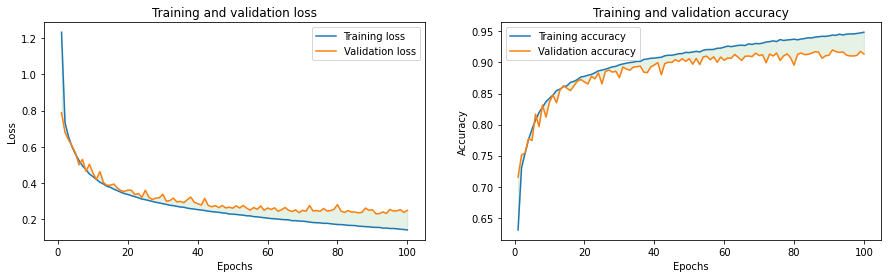

In [ ]:
import matplotlib.pyplot as plt

#Displaying Training and validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Loss and Accuracy are nicely converged and generalization gap between training and validation is not significantly large.

In [ ]:
#Increasing number of conv layers to see if we can increase accuracy
model_conv_1 = Sequential()

model_conv_1.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu', padding='same'))
model_conv_1.add(layers.MaxPooling2D((2, 2)))

model_conv_1.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_conv_1.add(layers.MaxPooling2D((2, 2)))

model_conv_1.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model_conv_1.add(layers.MaxPooling2D((2, 2)))

model_conv_1.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model_conv_1.add(layers.MaxPooling2D((2, 2)))

model_conv_1.add(layers.Flatten())
model_conv_1.add(layers.Dense(512, activation='relu'))
model_conv_1.add(layers.Dense(10, activation='softmax'))

model_conv_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model_conv_1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 3, 3, 256)        

In [ ]:
history=model_conv_1.fit(x_train,y_train,batch_size=512,validation_data=(x_val,y_val), epochs=100)

Epoch 1/100
98/98 [==============================] - 3s 22ms/step - loss: 1.8463 - acc: 0.4583 - val_loss: 0.8951 - val_acc: 0.6805
Epoch 2/100
98/98 [==============================] - 2s 19ms/step - loss: 0.8268 - acc: 0.6967 - val_loss: 0.7394 - val_acc: 0.7109
Epoch 3/100
98/98 [==============================] - 2s 19ms/step - loss: 0.7115 - acc: 0.7337 - val_loss: 0.7222 - val_acc: 0.7143
Epoch 4/100
98/98 [==============================] - 2s 19ms/step - loss: 0.6516 - acc: 0.7532 - val_loss: 0.6286 - val_acc: 0.7536
Epoch 5/100
98/98 [==============================] - 2s 19ms/step - loss: 0.6130 - acc: 0.7684 - val_loss: 0.5911 - val_acc: 0.7626
Epoch 6/100
98/98 [==============================] - 2s 19ms/step - loss: 0.5825 - acc: 0.7776 - val_loss: 0.5347 - val_acc: 0.7984
Epoch 7/100
98/98 [==============================] - 2s 20ms/step - loss: 0.5338 - acc: 0.7996 - val_loss: 0.5219 - val_acc: 0.8118
Epoch 8/100
98/98 [==============================] - 2s 20ms/step - loss: 0.

In [ ]:
#Testing on Val
val_loss, val_acc = model_conv_1.evaluate(x_val,y_val)
print(f'val_loss: {val_loss}')
print(f'val_acc: {val_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2234 - acc: 0.9220
val_loss: 0.22343286871910095
val_acc: 0.921999990940094


In [ ]:
#Testing on Test set
test_loss, test_acc = model_conv_1.evaluate(x_test,y_test)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2485 - acc: 0.9157
test_loss: 0.2485085278749466
test_acc: 0.9157000184059143


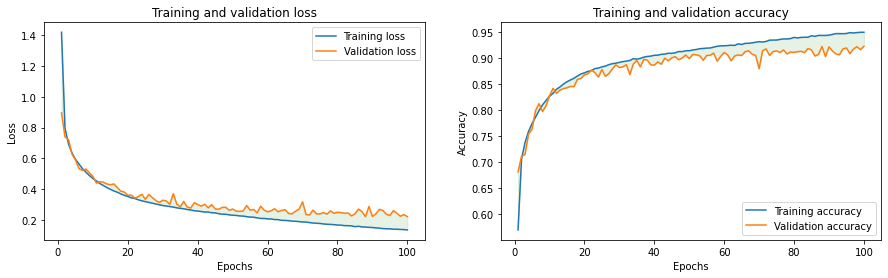

In [ ]:
#Displaying Training and validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Increasing number of layers
model_conv_2 = Sequential()

model_conv_2.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu', padding='same'))
model_conv_2.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu', padding='same'))
model_conv_2.add(MaxPooling2D(pool_size=(2,2)))

model_conv_2.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_conv_2.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_conv_2.add(MaxPooling2D(pool_size=(2)))

model_conv_2.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model_conv_2.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model_conv_2.add(MaxPooling2D(pool_size=(2,2)))

model_conv_2.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model_conv_2.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model_conv_2.add(MaxPooling2D(pool_size=(2,2)))

model_conv_2.add(Flatten())
model_conv_2.add(layers.Dense(512, activation='relu')),
model_conv_2.add(Dense(10, activation='softmax'))

model_conv_2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model_conv_2.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 7, 7, 128)       

In [ ]:
history=model_conv_2.fit(x_train,y_train,batch_size=512,validation_data=(x_val,y_val), epochs=100)

Epoch 1/100
98/98 [==============================] - 5s 43ms/step - loss: 1.6707 - acc: 0.4530 - val_loss: 0.8929 - val_acc: 0.6559
Epoch 2/100
98/98 [==============================] - 4s 41ms/step - loss: 0.8514 - acc: 0.6760 - val_loss: 0.8726 - val_acc: 0.6771
Epoch 3/100
98/98 [==============================] - 4s 41ms/step - loss: 0.7273 - acc: 0.7260 - val_loss: 0.6369 - val_acc: 0.7617
Epoch 4/100
98/98 [==============================] - 4s 41ms/step - loss: 0.6408 - acc: 0.7557 - val_loss: 0.5580 - val_acc: 0.7943
Epoch 5/100
98/98 [==============================] - 4s 41ms/step - loss: 0.5673 - acc: 0.7864 - val_loss: 0.5222 - val_acc: 0.8069
Epoch 6/100
98/98 [==============================] - 4s 42ms/step - loss: 0.5144 - acc: 0.8108 - val_loss: 0.5215 - val_acc: 0.7971
Epoch 7/100
98/98 [==============================] - 4s 42ms/step - loss: 0.4708 - acc: 0.8271 - val_loss: 0.4589 - val_acc: 0.8331
Epoch 8/100
98/98 [==============================] - 4s 42ms/step - loss: 0.

In [ ]:
#Testing on Val
val_loss, val_acc = model_conv_2.evaluate(x_val,y_val)
print(f'val_loss: {val_loss}')
print(f'val_acc: {val_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.4876 - acc: 0.9159
val_loss: 0.48756957054138184
val_acc: 0.9158999919891357


Adding number of layers does not give an significant rise in accuracy. Adding batch normalization to model_1 with 04 layers.

In [ ]:
#Adding batch normalization using the same model structure model conv_1
model_conv_3 = Sequential()

model_conv_3.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu', padding='same'))
model_conv_3.add(BatchNormalization(axis=3))
model_conv_3.add(layers.MaxPooling2D((2, 2)))

model_conv_3.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_conv_3.add(BatchNormalization(axis=3))
model_conv_3.add(layers.MaxPooling2D((2, 2)))

model_conv_3.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model_conv_3.add(BatchNormalization(axis=3))
model_conv_3.add(layers.MaxPooling2D((2, 2)))

model_conv_3.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model_conv_3.add(BatchNormalization(axis=3))
model_conv_3.add(layers.MaxPooling2D((2, 2)))

model_conv_3.add(layers.Flatten())
model_conv_3.add(layers.Dense(512, activation='relu'))
model_conv_3.add(layers.Dense(10, activation='softmax'))

model_conv_3.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model_conv_3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_32 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_33 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 7, 7, 128)       

In [ ]:
history=model_conv_3.fit(x_train,y_train,batch_size=512,validation_data=(x_val,y_val), epochs=100)

Epoch 1/100
98/98 [==============================] - 4s 26ms/step - loss: 0.8805 - acc: 0.7116 - val_loss: 2.3228 - val_acc: 0.1221
Epoch 2/100
98/98 [==============================] - 2s 24ms/step - loss: 0.3525 - acc: 0.8743 - val_loss: 2.4779 - val_acc: 0.1017
Epoch 3/100
98/98 [==============================] - 2s 24ms/step - loss: 0.2741 - acc: 0.9013 - val_loss: 2.2928 - val_acc: 0.1337
Epoch 4/100
98/98 [==============================] - 2s 24ms/step - loss: 0.2378 - acc: 0.9135 - val_loss: 1.5010 - val_acc: 0.5274
Epoch 5/100
98/98 [==============================] - 2s 24ms/step - loss: 0.2024 - acc: 0.9277 - val_loss: 0.7666 - val_acc: 0.7384
Epoch 6/100
98/98 [==============================] - 2s 24ms/step - loss: 0.1776 - acc: 0.9374 - val_loss: 0.4087 - val_acc: 0.8489
Epoch 7/100
98/98 [==============================] - 2s 24ms/step - loss: 0.1506 - acc: 0.9474 - val_loss: 0.3505 - val_acc: 0.8717
Epoch 8/100
98/98 [==============================] - 2s 24ms/step - loss: 0.

In [ ]:
#Testing on Val
val_loss, val_acc = model_conv_3.evaluate(x_val,y_val)
print(f'val_loss: {val_loss}')
print(f'val_acc: {val_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.9034 - acc: 0.9002
val_loss: 0.9033563733100891
val_acc: 0.9002000093460083


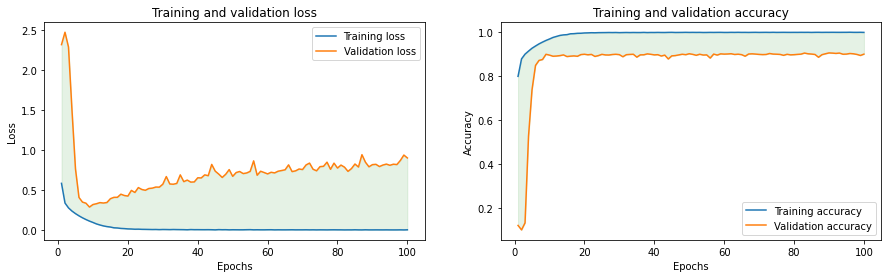

In [ ]:
#Displaying Training and validation accuracy and loss
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Adding batch normalization has increased loss along with generalization gap.

In [ ]:
#Adding dropout
model_conv_4 = Sequential()

model_conv_4.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu', padding='same'))
model_conv_4.add(layers.MaxPooling2D((2, 2)))

model_conv_4.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_conv_4.add(layers.MaxPooling2D((2, 2)))

model_conv_4.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model_conv_4.add(layers.MaxPooling2D((2, 2)))

model_conv_4.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model_conv_4.add(layers.MaxPooling2D((2, 2)))

model_conv_4.add(layers.Flatten())
model_conv_4.add(layers.Dense(512, activation='relu'))
model_conv_4.add(keras.layers.Dropout(0.2)),
model_conv_4.add(layers.Dense(10, activation='softmax'))

model_conv_4.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model_conv_4.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_62 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 3, 3, 256)       

In [ ]:
history=model_conv_4.fit(x_train,y_train,batch_size=512,validation_data=(x_val,y_val), epochs=100)

Epoch 1/100
98/98 [==============================] - 3s 22ms/step - loss: 1.8306 - acc: 0.4234 - val_loss: 0.8877 - val_acc: 0.6739
Epoch 2/100
98/98 [==============================] - 2s 19ms/step - loss: 0.8955 - acc: 0.6581 - val_loss: 0.7355 - val_acc: 0.7240
Epoch 3/100
98/98 [==============================] - 2s 19ms/step - loss: 0.7462 - acc: 0.7173 - val_loss: 0.6541 - val_acc: 0.7565
Epoch 4/100
98/98 [==============================] - 2s 19ms/step - loss: 0.6762 - acc: 0.7458 - val_loss: 0.5942 - val_acc: 0.7779
Epoch 5/100
98/98 [==============================] - 2s 19ms/step - loss: 0.6154 - acc: 0.7686 - val_loss: 0.5839 - val_acc: 0.7706
Epoch 6/100
98/98 [==============================] - 2s 20ms/step - loss: 0.5763 - acc: 0.7845 - val_loss: 0.5512 - val_acc: 0.7947
Epoch 7/100
98/98 [==============================] - 2s 19ms/step - loss: 0.5433 - acc: 0.7989 - val_loss: 0.5089 - val_acc: 0.8059
Epoch 8/100
98/98 [==============================] - 2s 20ms/step - loss: 0.

In [ ]:
#Testing on Val
val_loss, val_acc = model_conv_4.evaluate(x_val,y_val)
print(f'test_loss: {val_loss}')
print(f'test_acc: {val_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2494 - acc: 0.9120
test_loss: 0.249411478638649
test_acc: 0.9120000004768372


In [ ]:
#Increasing dropout from 0.2 to 0.5
model_conv_5 = Sequential()

model_conv_5.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu', padding='same'))
model_conv_5.add(layers.MaxPooling2D((2, 2)))

model_conv_5.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_conv_5.add(layers.MaxPooling2D((2, 2)))

model_conv_5.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model_conv_5.add(layers.MaxPooling2D((2, 2)))

model_conv_5.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model_conv_5.add(layers.MaxPooling2D((2, 2)))

model_conv_5.add(layers.Flatten())
model_conv_5.add(layers.Dense(512, activation='relu'))
model_conv_5.add(keras.layers.Dropout(0.5)),
model_conv_5.add(layers.Dense(10, activation='softmax'))

model_conv_5.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model_conv_5.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 256)         2

In [ ]:
history=model_conv_5.fit(x_train,y_train,batch_size=512,validation_data=(x_val,y_val), epochs=100)

Epoch 1/100
98/98 [==============================] - 36s 28ms/step - loss: 1.9418 - acc: 0.3395 - val_loss: 0.9733 - val_acc: 0.6607
Epoch 2/100
98/98 [==============================] - 2s 19ms/step - loss: 0.9953 - acc: 0.6116 - val_loss: 0.7801 - val_acc: 0.6912
Epoch 3/100
98/98 [==============================] - 2s 19ms/step - loss: 0.8010 - acc: 0.7020 - val_loss: 0.6874 - val_acc: 0.7481
Epoch 4/100
98/98 [==============================] - 2s 19ms/step - loss: 0.7008 - acc: 0.7355 - val_loss: 0.6251 - val_acc: 0.7659
Epoch 5/100
98/98 [==============================] - 2s 19ms/step - loss: 0.6408 - acc: 0.7563 - val_loss: 0.5947 - val_acc: 0.7746
Epoch 6/100
98/98 [==============================] - 2s 19ms/step - loss: 0.5973 - acc: 0.7746 - val_loss: 0.5435 - val_acc: 0.7964
Epoch 7/100
98/98 [==============================] - 2s 19ms/step - loss: 0.5648 - acc: 0.7878 - val_loss: 0.5109 - val_acc: 0.8106
Epoch 8/100
98/98 [==============================] - 2s 19ms/step - loss: 0

In [ ]:
#Testing on Val
val_loss, val_acc = model_conv_5.evaluate(x_val,y_val)
print(f'Val_loss: {val_loss}')
print(f'Val_acc: {val_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.2269 - acc: 0.9195
test_loss: 0.22685758769512177
test_acc: 0.9194999933242798


After applying batch normalization, no major improvement observed in accuracy.

Conclusion: After experimenting with different models by adding conv layers and parameter tuning, the best validation and test accuracy achieved was 92% which was from model-1 with 04 conv layers. Dropout and bactch normalization did not had a significant improvement on the results.


### Task 1.3 Build an input pipeline for data augmentation

*(weight ~3%)*

Build a data preprocessing pipeline to perform data augmentation. (You may use Keras ImageDataGenerator or write your own transformations.)

- Report the new classification accuracy. Make sure that you use the same number of training epochs as in Task 1.2.

- (Optional) Profile your input pipeline to identify the most time-consuming operation. What actions have you taken to address that slow operation? (*Hint: You may use the [TensorFlow Profiler](https://github.com/tensorflow/profiler).*)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras import models,layers,optimizers
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
# load dataset
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()
# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
# convert from integers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# normalize to range 0-1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
#Reserving 10% data for validation set from training set and creating input pipelines
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

x_val.shape,y_val.shape
x_train.shape,y_train.shape

((50000, 28, 28, 1), (50000, 10))

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range = 8,  
        zoom_range = 0.1,  
        shear_range = 0.3,
        width_shift_range=0.08, 
        height_shift_range=0.08,  
        vertical_flip=True)

In [ ]:
datagen.fit(x_train)

In [ ]:
#Increasing number of conv layers to see if we can increase accuracy
model_conv_1 = Sequential()

model_conv_1.add(Conv2D(32,(3,3), input_shape=(28,28,1),activation='relu', padding='same'))
model_conv_1.add(layers.MaxPooling2D((2, 2)))

model_conv_1.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_conv_1.add(layers.MaxPooling2D((2, 2)))

model_conv_1.add(Conv2D(128,(3,3),activation='relu', padding='same'))
model_conv_1.add(layers.MaxPooling2D((2, 2)))

model_conv_1.add(Conv2D(256,(3,3),activation='relu', padding='same'))
model_conv_1.add(layers.MaxPooling2D((2, 2)))

model_conv_1.add(layers.Flatten())
model_conv_1.add(layers.Dense(512, activation='relu'))
model_conv_1.add(layers.Dense(10, activation='softmax'))

model_conv_1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

model_conv_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 256)        

In [ ]:
history = model_conv_1.fit_generator(datagen.flow(x_train, y_train, batch_size = 512),epochs = 100,validation_data = (x_val, y_val))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
98/98 [==============================] - 13s 129ms/step - loss: 1.9581 - acc: 0.3533 - val_loss: 1.0695 - val_acc: 0.5789
Epoch 2/100
98/98 [==============================] - 12s 127ms/step - loss: 1.1157 - acc: 0.5588 - val_loss: 0.9405 - val_acc: 0.6343
Epoch 3/100
98/98 [==============================] - 12s 124ms/step - loss: 1.0026 - acc: 0.6064 - val_loss: 0.9325 - val_acc: 0.6139
Epoch 4/100
98/98 [==============================] - 12s 123ms/step - loss: 0.9380 - acc: 0.6334 - val_loss: 0.8376 - val_acc: 0.6779
Epoch 5/100
98/98 [==============================] - 12s 124ms/step - loss: 0.8717 - acc: 0.6651 - val_loss: 0.7553 - val_acc: 0.7110
Epoch 6/100
98/98 [==============================] - 12s 124ms/step - loss: 0.8264 - acc: 0.6834 - val_loss: 0.7388 - val_acc: 0.7133
Epoch 7/100
98/98 [==============================] - 12s 126ms/step - loss: 0.7910 - acc: 0.6961 - val_loss: 0.7701 - val_acc: 0.6777
Epoch 8/100
98/98 [==============================] - 12s 125ms

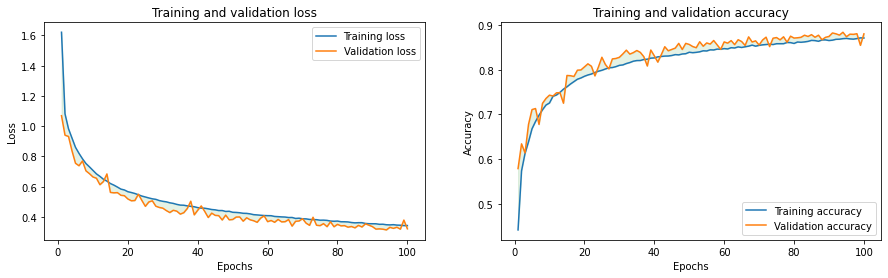

In [ ]:
#Displaying Training and validation accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

After doing data augmentation, the accuracy slightly decreased but the generalisation gap between training and validation loss and accuracy decreased significantly. This shows that after data augmentation, the model is not overfitting the data which was a major concern with previous models.

In [ ]:
#Testing on Test set
test_loss, test_acc = model_conv_1.evaluate(x_test,y_test)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.3330 - acc: 0.8797
test_loss: 0.3329941928386688
test_acc: 0.8797000050544739


### Task 1.4 Fashion-MNIST with transfer learning

*(weight ~3%)*

Use a pretrained model as the convolutional base to improve the classification performance. (Hint: You may use models in Keras Applications or those in the TensorFlow Hub.)

- Try both with fine-tuning and without fine-tuning.
- Report the model performance as before.



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot
from tensorflow.keras import models,layers,optimizers
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np

In [ ]:
# load dataset
import numpy as np
(x_train, y_train), (x_test, y_test) =  tf.keras.datasets.fashion_mnist.load_data()
# reshape data as VGG can only take data above 32*32*3 
x_train=x_train.reshape(60000,28*28)
x_test=x_test.reshape(10000,28*28)
# Convert the images into 3 channels
x_train=np.dstack([x_train] * 3)
x_test=np.dstack([x_test]*3)
x_train = x_train.reshape(-1, 28,28,3)
x_test=x_test.reshape(-1,28,28,3)


In [ ]:
#Converting into 48*48*3
from keras.preprocessing.image import img_to_array, array_to_img
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])
x_train.shape,x_test.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [ ]:
# Normalise the data and change data type
x_train = x_train / 255.0
x_test = x_test / 255.0
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# one hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
#Reserving 10% data for validation set from training set and creating input pipelines
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
#VGG 16
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape = (48,48,3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [ ]:
conv_base.trainable = False
model_conv_trans = Sequential()

model_conv_trans.add(conv_base)

model_conv_trans.add(layers.Flatten())
model_conv_trans.add(layers.Dense(256, activation='relu'))
#model_conv_trans.add(layers.Dropout(0.2))
model_conv_trans.add(layers.Dense(10, activation='softmax'))

model_conv_trans.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model_conv_trans.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
history = model_conv_trans.fit(x_train,y_train,steps_per_epoch=100,epochs=30,validation_data=(x_val,y_val),validation_steps=100)

Epoch 1/30
100/100 [==============================] - 21s 154ms/step - loss: 2.1083 - acc: 0.3344 - val_loss: 1.2212 - val_acc: 0.7270
Epoch 2/30
100/100 [==============================] - 14s 144ms/step - loss: 1.0719 - acc: 0.7431 - val_loss: 0.7810 - val_acc: 0.7703
Epoch 3/30
100/100 [==============================] - 14s 142ms/step - loss: 0.7271 - acc: 0.7780 - val_loss: 0.6358 - val_acc: 0.7910
Epoch 4/30
100/100 [==============================] - 14s 139ms/step - loss: 0.6084 - acc: 0.7988 - val_loss: 0.5674 - val_acc: 0.8061
Epoch 5/30
100/100 [==============================] - 14s 137ms/step - loss: 0.5499 - acc: 0.8127 - val_loss: 0.5290 - val_acc: 0.8167
Epoch 6/30
100/100 [==============================] - 14s 137ms/step - loss: 0.5096 - acc: 0.8239 - val_loss: 0.5034 - val_acc: 0.8251
Epoch 7/30
100/100 [==============================] - 14s 139ms/step - loss: 0.4874 - acc: 0.8296 - val_loss: 0.4843 - val_acc: 0.8292
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
#Testing on Validation set
val_loss, val_acc = model_conv_trans.evaluate(x_val,y_val)
print(f'test_loss: {val_loss}')
print(f'test_acc: {val_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.3778 - acc: 0.8641
test_loss: 0.37783968448638916
test_acc: 0.8640999794006348


In [ ]:
#Testing on Test set
test_loss, test_acc = model_conv_trans.evaluate(x_test,y_test)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.3891 - acc: 0.8643
test_loss: 0.38914918899536133
test_acc: 0.864300012588501


In [ ]:
#Fine Tuning
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model_conv_trans.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
model_conv_trans.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 7,213,322
Non-trainable params: 7,635,264
_________________________________________________________________


In [ ]:
#fine_tuned_history = model_conv_trans.fit(x_train,y_train,batch_size=512,epochs=50,validation_data=(x_val,y_val))
fine_tuned_history = model_conv_trans.fit(x_train,y_train,steps_per_epoch=100,epochs=30,validation_data=(x_val,y_val),validation_steps=100)

Epoch 1/30
100/100 [==============================] - 18s 168ms/step - loss: 0.9391 - acc: 0.7733 - val_loss: 0.4272 - val_acc: 0.8466
Epoch 2/30
100/100 [==============================] - 17s 170ms/step - loss: 0.3171 - acc: 0.8824 - val_loss: 0.2965 - val_acc: 0.8869
Epoch 3/30
100/100 [==============================] - 17s 168ms/step - loss: 0.2490 - acc: 0.9076 - val_loss: 0.2626 - val_acc: 0.9034
Epoch 4/30
100/100 [==============================] - 16s 165ms/step - loss: 0.2096 - acc: 0.9200 - val_loss: 0.2466 - val_acc: 0.9081
Epoch 5/30
100/100 [==============================] - 16s 164ms/step - loss: 0.1788 - acc: 0.9323 - val_loss: 0.3698 - val_acc: 0.8784
Epoch 6/30
100/100 [==============================] - 17s 166ms/step - loss: 0.1633 - acc: 0.9404 - val_loss: 0.2682 - val_acc: 0.9065
Epoch 7/30
100/100 [==============================] - 17s 166ms/step - loss: 0.1349 - acc: 0.9499 - val_loss: 0.2756 - val_acc: 0.9044
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
#Testing on Test set
test_loss, test_acc = model_conv_trans.evaluate(x_test,y_test)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 4s 12ms/step - loss: 0.5316 - acc: 0.9186
test_loss: 0.5316325426101685
test_acc: 0.9186000227928162


### Task 1.5 Performance comparison

*(weight ~3%)*

How many parameters are trainable in each of the two settings (with and without fine-tuning)? How does the difference impact the training time?


Which setting achieved higher accuracy? Why did it work better for this problem? 

Have we benefitted from using the pretrained model?


**Trainable parameters without fine tuning**: 133,898

**Trainable parameters with fin tuning**:7,213,322

**Accuracy without fine tuning:** 87%

**Accuracy with fine tuning:** 92%

The accuracy is much better than previous convnet models. In legacy convnet models, a lot of hyperparameter tuning is required inorder to improve accuracy but with finetuned pretrained models, accuracy improved very quickly. So, in general pretrained models can prove to be useful as compared to legacy convnet models. 

## Task 2 Fast training of deep networks

*(weight ~20%)*

### Task 2.1 Train a highly accurate network for CIFAR10

*(weight ~7%)*

In this task, you will train deep neural networks on the [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html). Compared with the datasets that you have worked on so far, CIFAR10 represents a relatively larger multi-class classification problem and presents a great opportunity for you to solve a "harder" problem.



#### Task 2.1.1 Document the hardware used

Before you start, write down your hardware specifications, including 

- the GPU model, the number of GPUs, and the GPU memory
- the CPU model, the number of CPUs, and the CPU clock speed

(Hint: you may find commands like `nvidia-smi`, `lscpu` or `psutil` useful.)

In [ ]:
#!pip install py-cpuinfo
import nvidia_smi
import cpuinfo
import psutil

#GPU model
!nvidia-smi
#GPU memory
nvidia_smi.nvmlInit()
handle = nvidia_smi.nvmlDeviceGetHandleByIndex(0)
# card id 0 hardcoded here, there is also a call to get all available card ids, so we could iterate
info = nvidia_smi.nvmlDeviceGetMemoryInfo(handle)

print("Total GPU memory:", info.total)
print("Free GPU memory:", info.free)
print("Used GPU memory:", info.used)

nvidia_smi.nvmlShutdown()
#CPU model 
#print("CPU model:",cpuinfo.get_cpu_info()['brand_raw'])
# number of CPU
#print("Total Number of CPUs:",psutil.cpu_count())
print("Complete CPU information")
!lscpu
#!cat /proc/cpuinfo

Sat May  8 02:01:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P0    30W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#### Task 2.1.2 Train a "shallow" ConvNet

Build a ConvNet with fewer than 10 layers. Train the network until it converges. You will use this network as a baseline for the later experiments. 

- Plot the training and validation history. 
- Report the testing accuracy. 

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


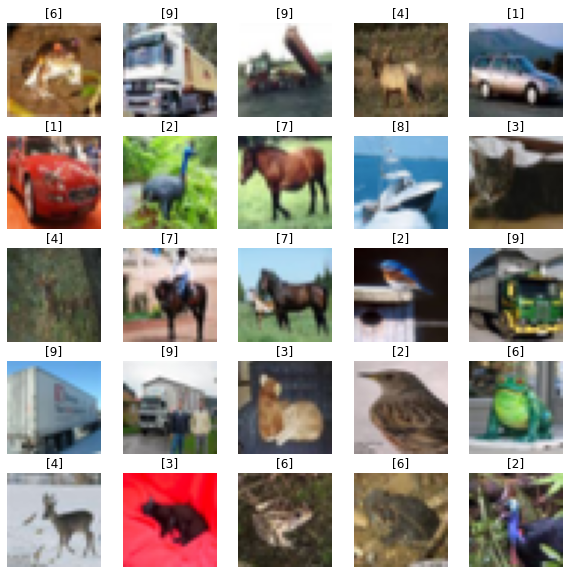

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import models,layers,optimizers
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.utils import np_utils
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# data shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# ploting 25 images
plt.figure(figsize=(10, 10))
for i in range(25):
  ax = plt.subplot(5, 5, i + 1)
  plt.imshow(x_train[i],cmap='gray')
  plt.title(y_train[i])
  plt.axis("off")

In [ ]:
#Pre-processing

#from keras.utils import to_categorical
# one hot encode target values
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# convert from integers to floats
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [ ]:
#Reserving 10% data for validation set from training set
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
x_val.shape,y_val.shape,x_train.shape,y_train.shape

((10000, 32, 32, 3), (10000, 10), (40000, 32, 32, 3), (40000, 10))

In [ ]:
#Building model with 04 layers
model_cfr_1 = Sequential()
model_cfr_1.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_cfr_1.add(Conv2D(32, (3, 3), activation='relu',  padding='same'))
model_cfr_1.add(MaxPooling2D((2, 2)))
model_cfr_1.add(keras.layers.Dropout(0.25))

model_cfr_1.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_cfr_1.add(Conv2D(64,(3,3),activation='relu', padding='same'))
model_cfr_1.add(layers.MaxPooling2D((2, 2)))
model_cfr_1.add(keras.layers.Dropout(0.25))

model_cfr_1.add(Flatten())
model_cfr_1.add(Dense(128, activation='relu'))
model_cfr_1.add(Dense(10, activation='softmax'))

# compile model
model_cfr_1.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='categorical_crossentropy', metrics=['acc'])

model_cfr_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)         

In [ ]:
history_cfr_1=model_cfr_1.fit(x_train, y_train, epochs=50, batch_size=128, validation_data=(x_val, y_val),shuffle=True)

Epoch 1/50
313/313 [==============================] - 6s 15ms/step - loss: 2.1240 - acc: 0.2169 - val_loss: 1.7633 - val_acc: 0.3777
Epoch 2/50
313/313 [==============================] - 5s 15ms/step - loss: 1.7082 - acc: 0.3922 - val_loss: 1.6074 - val_acc: 0.4223
Epoch 3/50
313/313 [==============================] - 5s 14ms/step - loss: 1.5696 - acc: 0.4349 - val_loss: 1.4795 - val_acc: 0.4787
Epoch 4/50
313/313 [==============================] - 5s 14ms/step - loss: 1.4831 - acc: 0.4656 - val_loss: 1.4196 - val_acc: 0.4942
Epoch 5/50
313/313 [==============================] - 4s 14ms/step - loss: 1.4253 - acc: 0.4881 - val_loss: 1.3659 - val_acc: 0.5118
Epoch 6/50
313/313 [==============================] - 5s 14ms/step - loss: 1.3614 - acc: 0.5156 - val_loss: 1.3143 - val_acc: 0.5316
Epoch 7/50
313/313 [==============================] - 5s 14ms/step - loss: 1.3192 - acc: 0.5277 - val_loss: 1.2899 - val_acc: 0.5427
Epoch 8/50
313/313 [==============================] - 5s 14ms/step - 

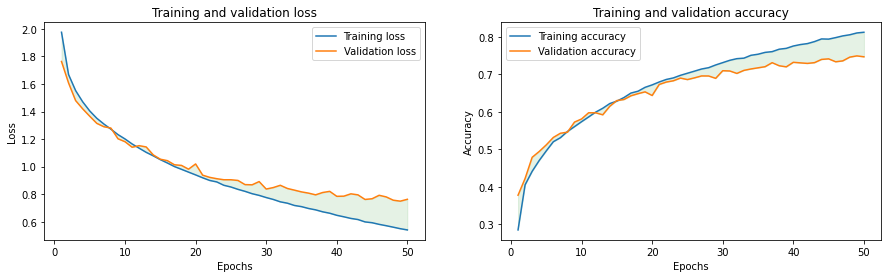

In [ ]:
#Displaying Training and validation accuracy and loss
import matplotlib.pyplot as plt
acc = history_cfr_1.history['acc']
val_acc = history_cfr_1.history['val_acc']
loss = history_cfr_1.history['loss']
val_loss = history_cfr_1.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Testing on Test set
test_loss, test_acc = model_cfr_1.evaluate(x_test,y_test)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.7860 - acc: 0.7318
test_loss: 0.785980761051178
test_acc: 0.7318000197410583


#### Task 2.1.3 Train a ResNet

Train a residual neural network (ResNet) on the CIFAR10 training data and report the test accuracy and the training time.

The ResNet is a popular network architecture for image classification. You may find more information about how ResNet works by reading this [paper](https://arxiv.org/abs/1512.03385).


*(You may implement a resnet model or use an existing implementation. In either case, you should not use pretrained network weights.)*

In [ ]:
from __future__ import print_function
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.applications import ResNet50
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
import os
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import models,layers,optimizers
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD
#from tensorflow.keras.utils import to_categorical

Impementing Resnet50 on cifar-10 on top of convnet model created in 2.1.2 

In [ ]:
# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# one hot encode target values
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# convert from integers to floats
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train.shape,x_test.shape,y_train.shape,y_test.shape

170500096/170498071 [==============================] - 2s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [ ]:
#Reserving 10% data for validation set from training set
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
x_val.shape,y_val.shape,x_train.shape,y_train.shape

((10000, 32, 32, 3), (10000, 10), (40000, 32, 32, 3), (40000, 10))

In [ ]:
Res_net= ResNet50(input_shape=(32,32,3), weights=None, pooling = 'avg', include_top=False,classes=10)

In [ ]:
#conv_base.trainable = False
for layer in Res_net.layers:
      layer.trainable = True
model_res = Sequential()

model_res.add(Res_net)

model_res.add(layers.Flatten())
model_res.add(layers.Dense(128, activation='relu'))
#model_conv_trans.add(layers.Dropout(0.2))
model_res.add(layers.Dense(10, activation='softmax'))

model_res.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])
model_res.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_3 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 23,851,274
Trainable params: 23,798,154
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
# Time Format
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

**Note:** Due to extremly high processing time and continous colab system downgradation to CPUs, I'm only using 25 epochs and minimum image size of 32x32x3.

In [ ]:
import time

start_time = time.time()

#checkpoint_path = "training_1/cp.ckpt"
#checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
#cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 #save_weights_only=False,
                                                 #save_freq='epoch')
                                                 

#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
history=model_res.fit(x_train,y_train, batch_size = 128, epochs = 25,validation_data=(x_val,y_val),shuffle=True)
  
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/25
313/313 [==============================] - 245s 765ms/step - loss: 2.5295 - acc: 0.1659 - val_loss: 2.7751 - val_acc: 0.1009
Epoch 2/25
313/313 [==============================] - 245s 783ms/step - loss: 1.9678 - acc: 0.2682 - val_loss: 1.9298 - val_acc: 0.2851
Epoch 3/25
313/313 [==============================] - 245s 783ms/step - loss: 1.7842 - acc: 0.3421 - val_loss: 1.7636 - val_acc: 0.3562
Epoch 4/25
313/313 [==============================] - 246s 785ms/step - loss: 1.6283 - acc: 0.4054 - val_loss: 1.6781 - val_acc: 0.3952
Epoch 5/25
313/313 [==============================] - 241s 771ms/step - loss: 1.5058 - acc: 0.4549 - val_loss: 1.6399 - val_acc: 0.4128
Epoch 6/25
313/313 [==============================] - 247s 789ms/step - loss: 1.3733 - acc: 0.5074 - val_loss: 1.6390 - val_acc: 0.4216
Epoch 7/25
313/313 [==============================] - 251s 801ms/step - loss: 1.2570 - acc: 0.5483 - val_loss: 1.5808 - val_acc: 0.4465
Epoch 8/25
313/313 [============================

As can be seen from above results, there is a massive generalization gap between training and validation set. We have training accuracy of 93% but validation and test accuracy is 50%. This shows that ResNet model without weights give very high training accuracy but do not perform good on test set. In below model I'm applying data augmentation improvement on the accuracy reults.

In [ ]:
#Applying Data Augmentation with Resnet
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=0,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=False)  
datagen.fit(x_train)

In [ ]:
#conv_base.trainable = False
for layer in Res_net.layers:
      layer.trainable = True
model_res = Sequential()

model_res.add(Res_net)

model_res.add(layers.Flatten())
model_res.add(layers.Dense(128, activation='relu'))
#model_conv_trans.add(layers.Dropout(0.2))
model_res.add(layers.Dense(10, activation='softmax'))

model_res.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-4),
              metrics=['acc'])
model_res.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               262272    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 23,851,274
Trainable params: 23,798,154
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
import time

start_time = time.time()
   
#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
history=model_res.fit_generator(datagen.flow(x_train,y_train, batch_size =128), epochs = 25,validation_data=(x_val,y_val))
 
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
313/313 [==============================] - 234s 729ms/step - loss: 2.4128 - acc: 0.1614 - val_loss: 2.7468 - val_acc: 0.1004
Epoch 2/25
313/313 [==============================] - 237s 757ms/step - loss: 2.0120 - acc: 0.2524 - val_loss: 1.9540 - val_acc: 0.2826
Epoch 3/25
313/313 [==============================] - 183s 585ms/step - loss: 1.8766 - acc: 0.3108 - val_loss: 1.8052 - val_acc: 0.3544
Epoch 4/25
313/313 [==============================] - 191s 611ms/step - loss: 1.7840 - acc: 0.3535 - val_loss: 1.8442 - val_acc: 0.3446
Epoch 5/25
313/313 [==============================] - 192s 612ms/step - loss: 1.6958 - acc: 0.3834 - val_loss: 1.7037 - val_acc: 0.3928
Epoch 6/25
313/313 [==============================] - 187s 597ms/step - loss: 1.6335 - acc: 0.4100 - val_loss: 1.5972 - val_acc: 0.4282
Epoch 7/25
313/313 [==============================] - 183s 586ms/step - loss: 1.5535 - acc: 0.4356 - val_loss: 1.5236 - val_acc: 0.4542
Epoch 8/25
313/313 [============================

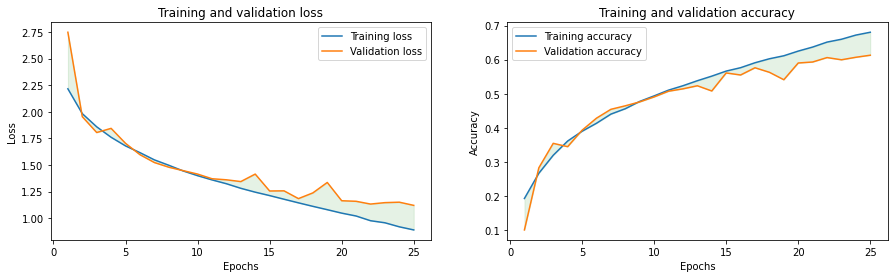

In [ ]:
#Displaying Training and validation accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(15,4))

ax1 = plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.fill_between(epochs, loss,val_loss,color='g',alpha=.1)

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

ax2 = plt.subplot(1, 2, 2)
plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.fill_between(epochs, acc,val_acc,color='g',alpha=.1)
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Evaluating on Validation
val_loss, val_acc = model_res.evaluate(x_val,y_val)
print(f'Val_loss: {val_loss}')
print(f'Val_acc: {val_acc}')

313/313 [==============================] - 19s 60ms/step - loss: 1.1211 - acc: 0.6129
Val_loss: 1.1211271286010742
Val_acc: 0.6129000186920166


In [ ]:
#Evaluating on test set
test_loss, test_acc = model_res.evaluate(x_test,y_test)
print(f'Val_loss: {test_loss}')
print(f'Val_acc: {test_acc}')

313/313 [==============================] - 19s 62ms/step - loss: 1.1270 - acc: 0.6118
Val_loss: 1.127042531967163
Val_acc: 0.6118000149726868


**Conclusion:**

After implemeting Resnet with data augmentation, we can see that validation accuracy increased and generalization gap also reduced and also reduced model training time. Due to high compution time I have reduced number of epochs to 25 and also kept image size to minimum of 32x32x3, so the training and validation accuracy still fully converged that is beacuse Resnet is a very dense network and with high number of epochs (200 atleast) and high image size , accuracy can definetly be improved further.

### Task 2.2 Fast training of ResNet

*(weight ~10%)*

In this task, you will experiment with different ways to reduce the time for training your ResNet on CIFAR10. There are different ways to speed up neural network training; below are two ideas. Please select at least one idea to implement. Explain the experiment steps and report the final performance and training time.

#### Option 1. Learning rate schedule

Use a learning rate schedule for the training. Some popular learning rate schedules include 

- the Step Decay learning rate (e.g., see [here](https://github.com/kuangliu/pytorch-cifar))
- [Cyclical learning rates](https://arxiv.org/abs/1506.01186)
- [The exponential learning rate](https://openreview.net/forum?id=rJg8TeSFDH) 

Also, Keras provides [some convenient functions](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules) that you can use.


#### Option 2. Look ahead optimiser

Read [this paper](https://arxiv.org/abs/1907.08610) and implement the Lookahead optimiser.

In [ ]:
!pip install tensorflow-addons

     |████████████████████████████████| 686kB 7.0MB/s 


In [ ]:
import tensorflow_addons as tfa
from __future__ import print_function
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler,EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.applications import ResNet50
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
import numpy as np
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import models,layers,optimizers
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.optimizers import SGD

In [ ]:
#Creating new model for exponential decay
Res_net= ResNet50(input_shape=(32,32,3), weights=None, pooling = 'avg', include_top=False,classes=10)
#conv_base.trainable = False
for layer in Res_net.layers:
      layer.trainable = True
model_res = Sequential()

model_res.add(Res_net)

model_res.add(layers.Flatten())
model_res.add(layers.Dense(128, activation='relu'))
#model_conv_trans.add(layers.Dropout(0.2))
model_res.add(layers.Dense(10, activation='softmax'))

In [ ]:
#Exponential Decay learning rate
initial_learning_rate=1e-4
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.96,
    staircase=True)
model_res.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr_schedule),
              metrics=['acc'])
model_res.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 23,851,274
Trainable params: 23,798,154
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
import time

start_time = time.time()

#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
model_res.fit_generator(datagen.flow(x_train,y_train, batch_size = 128), validation_data=(x_val,y_val) ,epochs = 25,shuffle=True)
  
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
313/313 [==============================] - 173s 534ms/step - loss: 2.4343 - acc: 0.1598 - val_loss: 2.6022 - val_acc: 0.0958
Epoch 2/25
313/313 [==============================] - 173s 553ms/step - loss: 1.9838 - acc: 0.2654 - val_loss: 1.9335 - val_acc: 0.2901
Epoch 3/25
313/313 [==============================] - 178s 569ms/step - loss: 1.8508 - acc: 0.3260 - val_loss: 1.7539 - val_acc: 0.3626
Epoch 4/25
313/313 [==============================] - 175s 560ms/step - loss: 1.7516 - acc: 0.3599 - val_loss: 1.6757 - val_acc: 0.3869
Epoch 5/25
313/313 [==============================] - 173s 553ms/step - loss: 1.6656 - acc: 0.3964 - val_loss: 1.6556 - val_acc: 0.4065
Epoch 6/25
313/313 [==============================] - 170s 543ms/step - loss: 1.5908 - acc: 0.4177 - val_loss: 1.5962 - val_acc: 0.4265
Epoch 7/25
313/313 [==============================] - 178s 568ms/step - loss: 1.5363 - acc: 0.4408 - val_loss: 1.5039 - val_acc: 0.4525
Epoch 8/25
313/313 [============================

In [ ]:
#Testing on Test set
test_loss, test_acc = model_res.evaluate(x_test,y_test)
print(f'test_loss: {test_loss}')
print(f'test_acc: {test_acc}')

313/313 [==============================] - 17s 55ms/step - loss: 1.1544 - acc: 0.6117
test_loss: 1.1543532609939575
test_acc: 0.6116999983787537


### Task 2.3 Performance comparison

*(weight ~3%)*

Based on the above experiments, which method or which combination of methods result in the best accuracy with the same training time.

After applying exponential decay, training time for ResNet has been reduced. Original Resnet took 84 minutes in training whereas exponential decay took 72 minutes. So there is an overall improvement of **14.28%** in training time with exponential decay along with improved validation accuracy and loss than original model. Please note that this training time is for 25 epochs, if we have high number of epochs than we can reduce **14.28%**  time with exponential decay.

## Task 3 (**HD level task**) Research on new models
*(weight ~10%)*

Today, ResNet has become a very mature ConvNet architecture. In this task, you will research one recent ConvNet architecture. You may choose an architecture from the reference list below.

Write a short report for your research, covering these points:

- Identify the main issues that your chosen architecture aims to address. (For example, does it try to reduce the number of parameters or to speed up the training?)
- What measures the architecture used to reduce the number of parameters, or reducing the training cost, or improving the model performance?

Implement the architecture and compare its performance on CIFAR10 with ResNet. You may include your implementation, experiments, and analyses here in this notebook.

**References**:

1. Huang G, Liu Z, Van Der Maaten L, Weinberger KQ. *Densely connected convolutional networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2017 (pp. 4700-4708).
2. Zhang X, Zhou X, Lin M, Sun J. *Shufflenet: An extremely efficient convolutional neural network for mobile devices*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 6848-6856).
3. Tan M, Le Q. *Efficientnet: Rethinking model scaling for convolutional neural networks*. In International Conference on Machine Learning 2019 May 24 (pp. 6105-6114). PMLR.
4. Hu J, Shen L, Sun G. *Squeeze-and-excitation networks*. In Proceedings of the IEEE conference on computer vision and pattern recognition 2018 (pp. 7132-7141).


**Densly Connected Convolutional Networks:**

In dense connected networks as the input or gradient passes through high number of layers it can vanish or wash out by time it reaches the end of the network. The arcitecture proposed in DenseNet, connects all layers in the netwook to ensure maximum information flow.

The idea behind DenseNet is that it connects each layer to every other layer in the network in a feed forward fashion as compared to tradiotional CNNs where L number of layers have L connections one between each layer and its subsequent layer. Each layer feature maps all preceeding layers as inputs and its own feature maps used as input to subsquent layers.

**Major Feautres of DenseNet:**

**Low computation requirements:**

DenseNet requires fewer parameters than traditional convolutional networks, as there is no need to relearn redundant feature-maps which in turn reduce computation load. Traditional feed-forward architectures can be viewed as algorithms with a state, which is passed on from layer to layer. Each layer reads the state from its preceding layer and writes to the subsequent layer. It changes the state but also passes on information that needs to be preserved.

**Easy to train:**

Besides better parameter efficiency, one big advantage of DenseNets is their improved flow of information and gradients throughout the network, which makes them easy to train. Each layer has direct access to the gradients from the
loss function and the original input signal, leading to an implicit deep supervision.

**Reduce Overfitting:**

Dense connections have a regularizing effect, which reduces overfitting on tasks with smaller training set sizes.

**DenseNet Architecture**:

Traditional convolutional feed-forward networks connect the output of the lth
layer as input to the(l + 1)th layer. Resnets add a skip-connection that bypasses the non-linear transformations so that the gradient can flow directly through the identity function from later layers to the earlier layers. 

Densenets improve this flow of information by proposing a different connectivity
pattern. It introduces direct connections from any layer to all subsequent layers. Consequently, the lth layer receives the feature-maps of all preceding layers.

**Implementing Dense net on Cifar-10 Dataset**

In [ ]:
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from tensorflow.keras import models,layers,optimizers
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.utils import np_utils
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# data shape
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)



(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
# Load the CIFAR10 data.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# one hot encode target values
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# convert from integers to floats
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 10), (10000, 10))

In [ ]:
#Reserving 10% data for validation set from training set
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
x_val.shape,y_val.shape,x_train.shape,y_train.shape

((10000, 32, 32, 3), (10000, 10), (40000, 32, 32, 3), (40000, 10))

In [ ]:
from keras.applications import DenseNet121
dense_net= DenseNet121(input_shape=(32,32,3), weights=None, pooling = 'avg', include_top=False,classes=10)

In [ ]:
#conv_base.trainable = False
from tensorflow.keras import models,layers,optimizers
for layer in dense_net.layers:
      layer.trainable = True
model_dense = Sequential()

model_dense.add(dense_net)

model_dense.add(layers.Flatten())
model_dense.add(layers.Dense(128, activation='relu'))
#model_conv_trans.add(layers.Dropout(0.2))
model_dense.add(layers.Dense(10, activation='softmax'))

model_dense.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model_dense.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 7,169,994
Trainable params: 7,086,346
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False, 
        rotation_range=0,  
        width_shift_range=0.1,  
        height_shift_range=0.1, 
        horizontal_flip=True, 
        vertical_flip=False)  
datagen.fit(x_train)

In [ ]:
# Time Format
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return f"{h}:{m:>02}:{s:>05.2f}"

In [ ]:
import time

start_time = time.time()

model_dense.fit_generator(datagen.flow(x_train,y_train, batch_size = 128), epochs = 20)
  
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
313/313 [==============================] - 173s 519ms/step - loss: 1.7650 - acc: 0.3537
Epoch 2/20
313/313 [==============================] - 159s 507ms/step - loss: 1.2572 - acc: 0.5538
Epoch 3/20
313/313 [==============================] - 157s 500ms/step - loss: 1.0646 - acc: 0.6212
Epoch 4/20
313/313 [==============================] - 160s 510ms/step - loss: 0.9486 - acc: 0.6654
Epoch 5/20
313/313 [==============================] - 162s 516ms/step - loss: 0.8517 - acc: 0.6989
Epoch 6/20
313/313 [==============================] - 157s 501ms/step - loss: 0.7779 - acc: 0.7270
Epoch 7/20
313/313 [==============================] - 158s 506ms/step - loss: 0.7297 - acc: 0.7474
Epoch 8/20
313/313 [==============================] - 158s 503ms/step - loss: 0.6772 - acc: 0.7604
Epoch 9/20
313/313 [==============================] - 158s 506ms/step - loss: 0.6387 - acc: 0.7795
Epoch 10/20
313/313 [==============================] - 157s 502ms/step - loss: 0.6123 - acc: 0.7857
Epoch 11/

In [ ]:
#Evaluating on Validation
val_loss, val_acc = model_dense.evaluate(x_val,y_val)
print(f'Val_loss: {val_loss}')
print(f'Val_acc: {val_acc}')

313/313 [==============================] - 25s 75ms/step - loss: 0.6925 - acc: 0.7772
Val_loss: 0.6925361752510071
Val_acc: 0.7771999835968018


In [ ]:
#Evaluating on test set
test_loss, test_acc = model_dense.evaluate(x_test,y_test)
print(f'Val_loss: {test_loss}')
print(f'Val_acc: {test_acc}')

313/313 [==============================] - 25s 79ms/step - loss: 0.7115 - acc: 0.7730
Val_loss: 0.711496889591217
Val_acc: 0.7730000019073486


**Running with pre-trained weight**

In [ ]:
dense_net_1= DenseNet121(input_shape=(32,32,3), weights='imagenet', pooling = 'avg', include_top=False,classes=10)

29089792/29084464 [==============================] - 1s 0us/step


In [ ]:
#conv_base.trainable = False
from tensorflow.keras import models,layers,optimizers
from keras.callbacks import EarlyStopping
for layer in dense_net_1.layers:
      layer.trainable = True
model_dense_1 = Sequential()

model_dense_1.add(dense_net_1)

model_dense_1.add(layers.Flatten())
model_dense_1.add(layers.Dense(128, activation='relu'))
#model_conv_trans.add(layers.Dropout(0.2))
model_dense_1.add(layers.Dense(10, activation='softmax'))

model_dense_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model_dense_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 1024)              7037504   
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 7,169,994
Trainable params: 7,086,346
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
import time

start_time = time.time()

#lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1), cooldown=0, patience=5, min_lr=0.5e-6)
model_dense_1.fit_generator(datagen.flow(x_train,y_train, batch_size = 128), epochs = 20)
  
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
313/313 [==============================] - 195s 587ms/step - loss: 1.3262 - acc: 0.5472
Epoch 2/20
313/313 [==============================] - 181s 577ms/step - loss: 0.6757 - acc: 0.7714
Epoch 3/20
313/313 [==============================] - 182s 581ms/step - loss: 0.5965 - acc: 0.7932
Epoch 4/20
313/313 [==============================] - 176s 562ms/step - loss: 0.4961 - acc: 0.8294
Epoch 5/20
313/313 [==============================] - 183s 584ms/step - loss: 0.4365 - acc: 0.8491
Epoch 6/20
313/313 [==============================] - 186s 593ms/step - loss: 0.4201 - acc: 0.8541
Epoch 7/20
313/313 [==============================] - 183s 585ms/step - loss: 0.3924 - acc: 0.8645
Epoch 8/20
313/313 [==============================] - 172s 550ms/step - loss: 0.3978 - acc: 0.8637
Epoch 9/20
313/313 [==============================] - 173s 553ms/step - loss: 0.3431 - acc: 0.8818
Epoch 10/20
313/313 [==============================] - 181s 577ms/step - loss: 0.3238 - acc: 0.8868
Epoch 11/

In [ ]:
#Evaluating on Validation
val_loss, val_acc = model_dense_1.evaluate(x_val,y_val)
print(f'Val_loss: {val_loss}')
print(f'Val_acc: {val_acc}')

313/313 [==============================] - 25s 73ms/step - loss: 0.6693 - acc: 0.7969
Val_loss: 0.6693212985992432
Val_acc: 0.7968999743461609


In [ ]:
#Evaluating on test set
test_loss, test_acc = model_dense_1.evaluate(x_test,y_test)
print(f'Val_loss: {test_loss}')
print(f'Val_acc: {test_acc}')

313/313 [==============================] - 23s 73ms/step - loss: 0.6992 - acc: 0.7903
Val_loss: 0.6991803646087646
Val_acc: 0.7903000116348267


**Conclusion:**

After running DenseNet on cifar-10 with same archtitecture and settings as Resnet, there is a clear improvement of accuracy with DenseNet in both models with weights and without weights.

There is also a clear accuracy improvement in Densenet with pre-trained weights. As can be seen model without weights achieved test accuracy of 77%. whereas with pre-trained weights test accuracy achieved was 79%.

---
**END OF ASSIGNMENT TWO**